In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df1=df

In [7]:
df1['MonthlyCharges'] = df1['MonthlyCharges'].round()



In [8]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

df1['TotalCharges']=df1['TotalCharges'].round()

In [9]:
#Cheking the wide spaces in Target column
df1.loc[df['TotalCharges']== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


There are total of 11 Rows which contain wide spaces we have to fill it.

In [10]:
df1['TotalCharges']=df1['TotalCharges'].replace(" ",np.nan)

In [11]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
np.mean(df1["TotalCharges"].round())

2283.2946530147897

In [13]:
df1['TotalCharges']=df1['TotalCharges'].fillna(np.mean(df1['TotalCharges']))
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# DATA VIZUALIZATION

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns

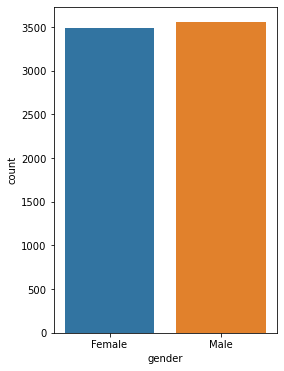

Male      3555
Female    3488
Name: gender, dtype: int64




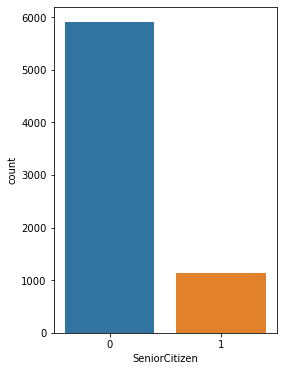

0    5901
1    1142
Name: SeniorCitizen, dtype: int64




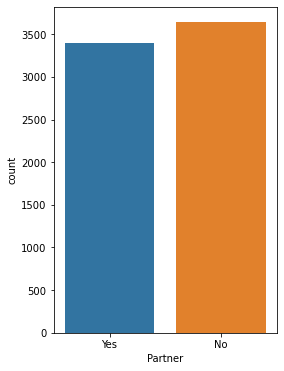

No     3641
Yes    3402
Name: Partner, dtype: int64




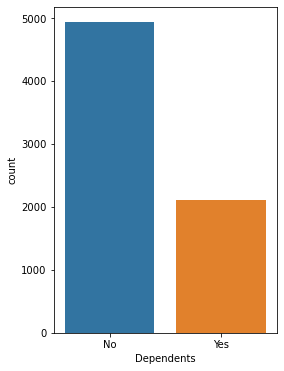

No     4933
Yes    2110
Name: Dependents, dtype: int64




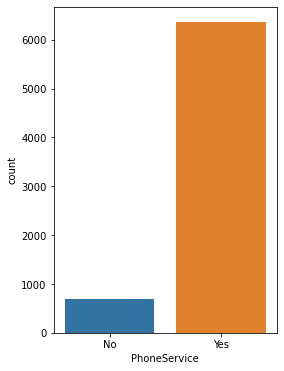

Yes    6361
No      682
Name: PhoneService, dtype: int64




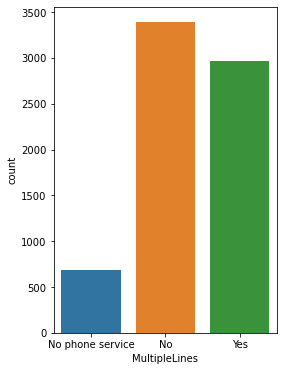

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64




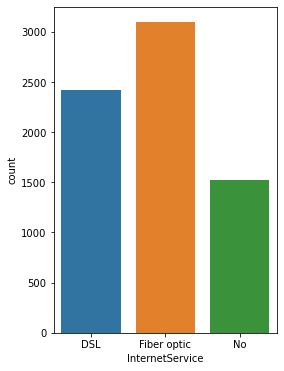

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64




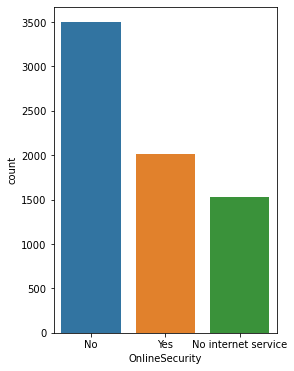

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64




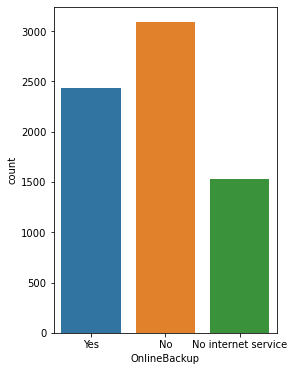

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64




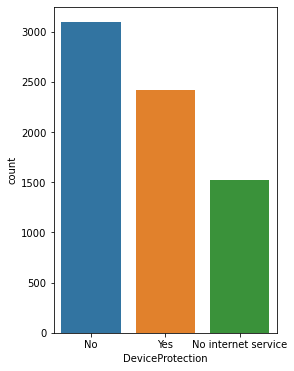

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64




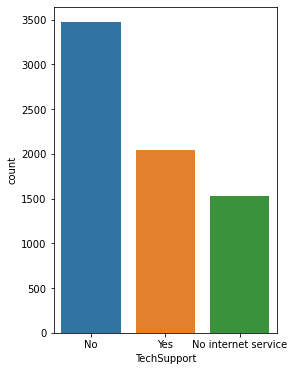

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64




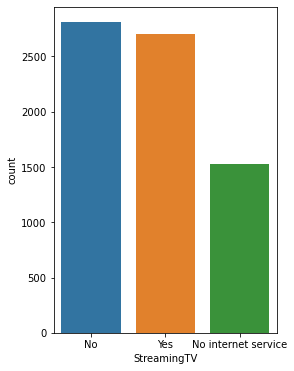

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64




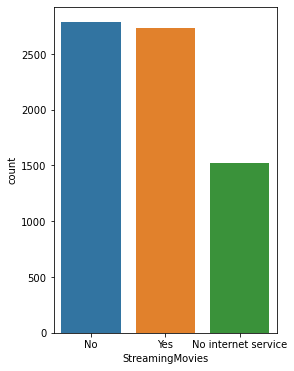

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64




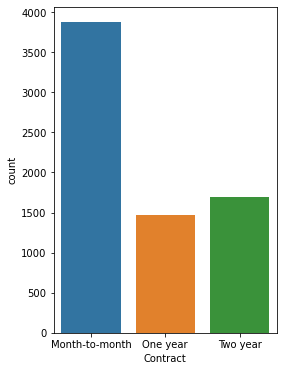

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64




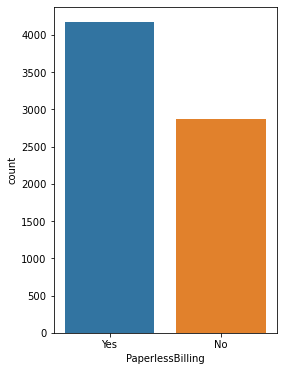

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64




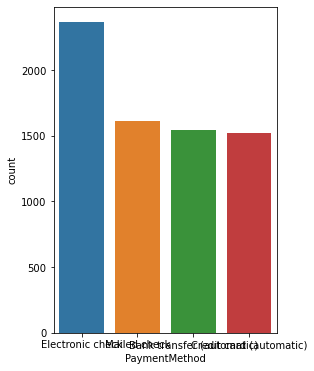

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64




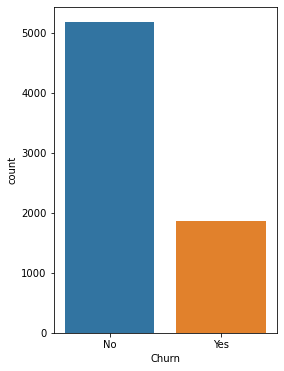

No     5174
Yes    1869
Name: Churn, dtype: int64




In [15]:
exclude_column=['MonthlyCharges','TotalCharges','tenure','customerID']

for i in df1.columns:
    if i not in exclude_column:
        plt.figure(figsize=(4,6))
        sns.countplot(x=i,data=df1)
        plt.show()
        print(df1[i].value_counts())
        print('\n')

* Gender- The number of Male Client are more than Female Client.

* Senior Citizen - SeniorCitizen  clients are less compared to Adults.

* Partner = Connection having no partner or sharing plan are 3402 and while sharng plan with partner is 3402

* Dependents= Kids who are dependent on their parent are 2110 while independent connections are 4933.

* Connections: having phone Services are 6361 while connections with no phone services are 682

* MultipleLines: Nophone services connection are 682 Connections having no multiplelines are 3390 while connections having MultipleLines are 2971

* Internet Service : Connections having DSL Connection are 2421 While fiber optic connections are  3096 and clients having no internet connections are 1526.

* Online security : connections having  No internet Service does reqire OnlinSecurity while connections having  those who hasve purchase online security from Virus or any any threat are 2019 while those who didn't  purchase any kind of ONlineSecurity are 3498

* Device Protections : Device Protection addon clients  are 2422 while those Who are not using any  insurance and protection against theft are 3095.

* TechSupport: 2044 Customers have subscribed TechSupport while 3473 have not subscribed to TechSupport  and  1526  connections having no Internet Service

* Streaming TV : Connections who are Streaming TV are 2727 while those who are not streaming TV are 2810 and 1526 having no  NO Internet Plan

* STREAMINGMOvie : Connections who are streaming Movies Service are 2732 while Who are not using Movies Servie are 2785 and Connections Who are not Using any INTERNET SERICE ARE 1526

* Contract: Monthly Contract Customers are 3875 Yearly Contracts Customers are 1473 and Customer having Two year Contracts are 1695.

* PaperlessBilling : Customers Using Digital form of Payments are 4171 While while Customer USing Old methods are 2872

* PaymentsMethods: Customer using Credit as  mode of Payments are 1522 , Customer who Sends payment Bill using bank Transfers are 1544  , Customerss who are Using Electronics Check for Bill Payements are 2365 while Customers who mailed their checks for Bill payments Services are 1612.

* Churn: Customers  who have Switched to another Teleservice due to any Reasons are 1869 while loyals customers are 5174.


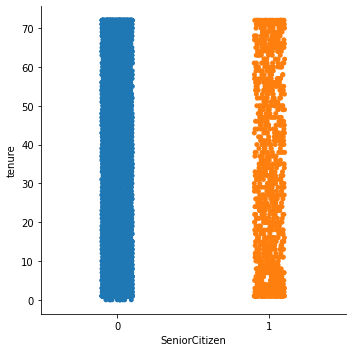

In [16]:
sns.catplot(y='tenure',x='SeniorCitizen',data=df1)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

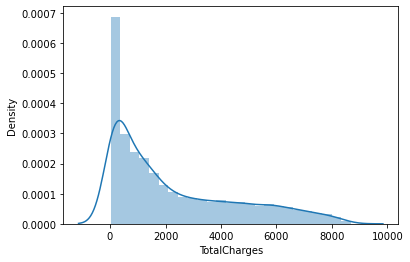

In [17]:
import warnings
warnings.filterwarnings('ignore')
continious=df1[["MonthlyCharges","TotalCharges"]].copy()
sns.distplot(continious['TotalCharges'],kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

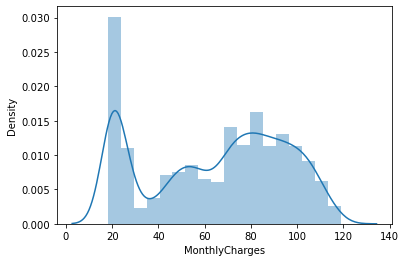

In [18]:
sns.distplot(continious["MonthlyCharges"],kde=True)

In [19]:
from sklearn.preprocessing import LabelEncoder

data_encoded = df1.copy()

label_encoder = LabelEncoder()

# Converting columns with 2 to 4 unique values to numerical values
for col in data_encoded.columns:
    if 2 <= data_encoded[col].nunique() <= 4:
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# Display updated dataset
df2=data_encoded
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,30.0,30.0,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,57.0,1890.0,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,54.0,108.0,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.0,1841.0,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,71.0,152.0,1


In [20]:
df2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.758768,2283.294653,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.091650,2264.998567,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,36.000000,402.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.000000,1401.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,90.000000,3786.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,119.000000,8685.000000,1.000000


Gender,Tenure,PhoneService,InternetService,OnlineBackup,DeviceProtection,StreamingTV,PaperlessBilling,PaymentMethod,MontlyCharge: less variablity, Data spread is not wide.


SeniorCitizen,Partner,Dependent,MultiplesLine,OnlineBackup,TechSupport,Contract,Churn:Greater Variability, wide spread of data

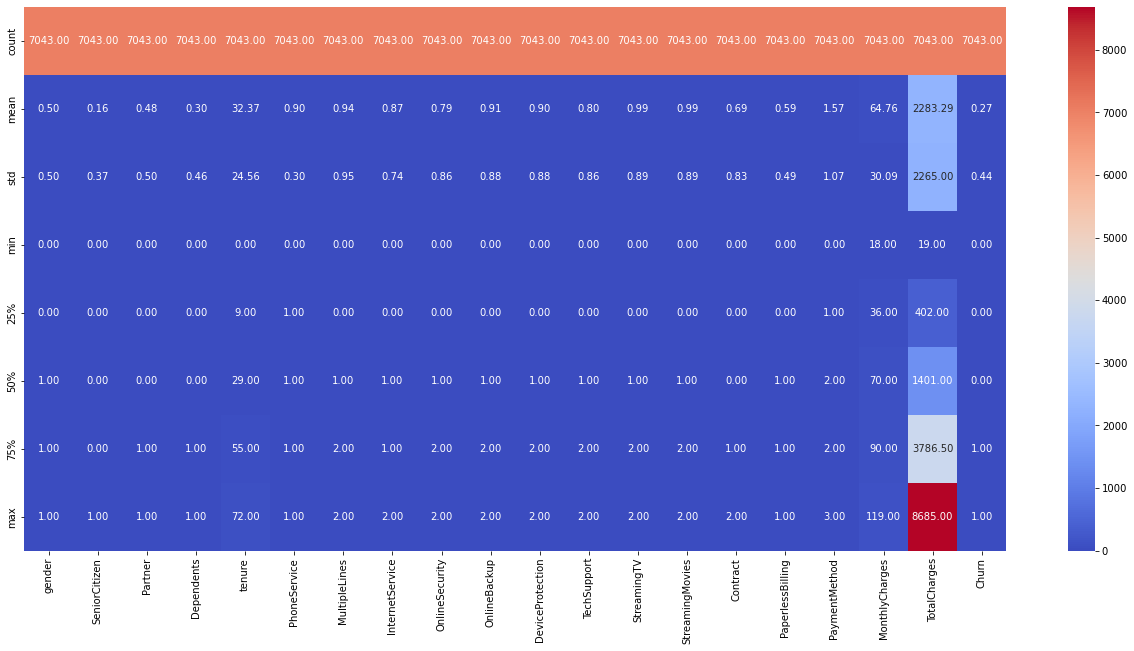

In [21]:
plt.figure(figsize=(22,10))
sns.heatmap(df2.describe(),annot=True,cmap='coolwarm',fmt="0.2f")
plt.show()

In [22]:
df2.corr()["TotalCharges"].sort_values()

PaymentMethod      -0.330151
Churn              -0.199426
InternetService    -0.175426
gender              0.000048
Dependents          0.064535
SeniorCitizen       0.102395
PhoneService        0.112854
PaperlessBilling    0.157674
OnlineSecurity      0.254309
TechSupport         0.276712
Partner             0.318811
OnlineBackup        0.375361
DeviceProtection    0.388860
StreamingTV         0.392292
StreamingMovies     0.397907
Contract            0.449509
MultipleLines       0.452884
MonthlyCharges      0.650409
tenure              0.824757
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

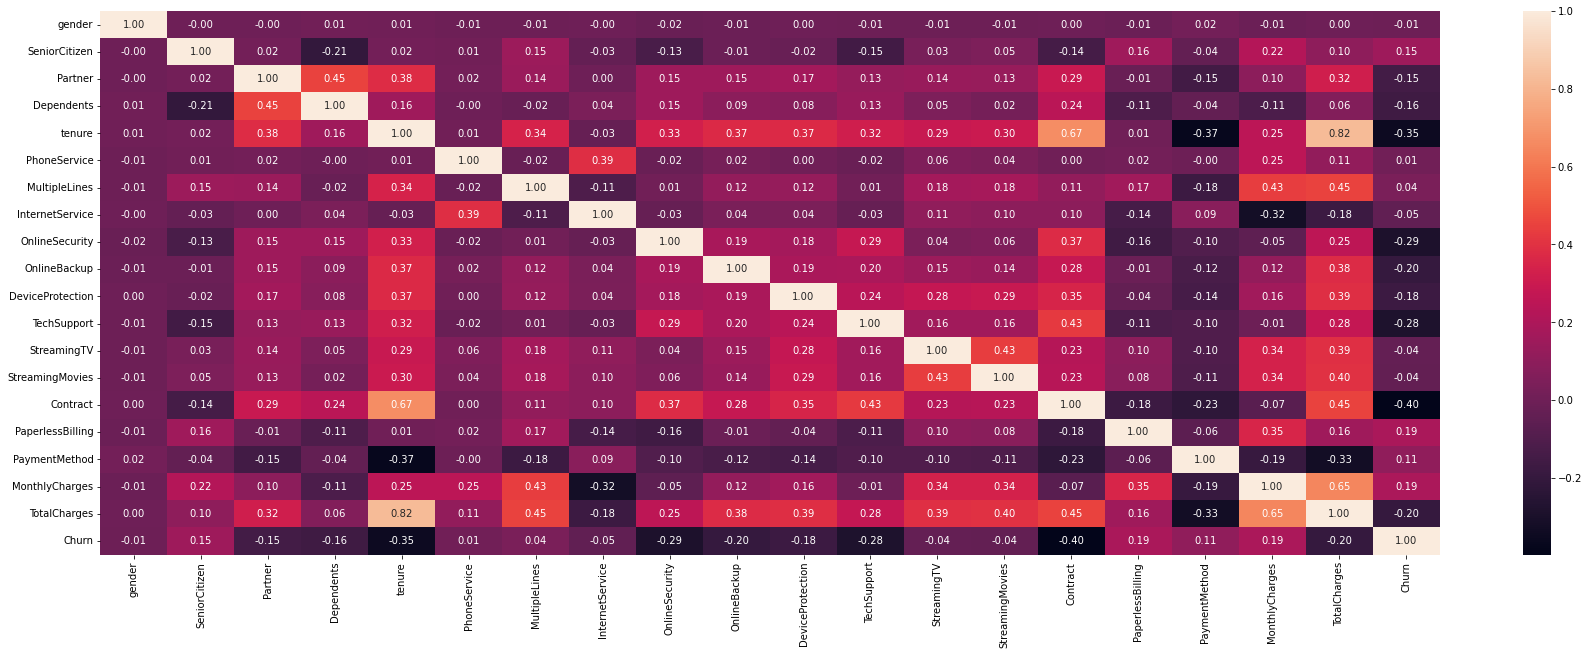

In [23]:
plt.figure(figsize=(30,10))
sns.heatmap(df2.corr(),annot=True,linecolor='black',fmt="0.2f")
plt.show()

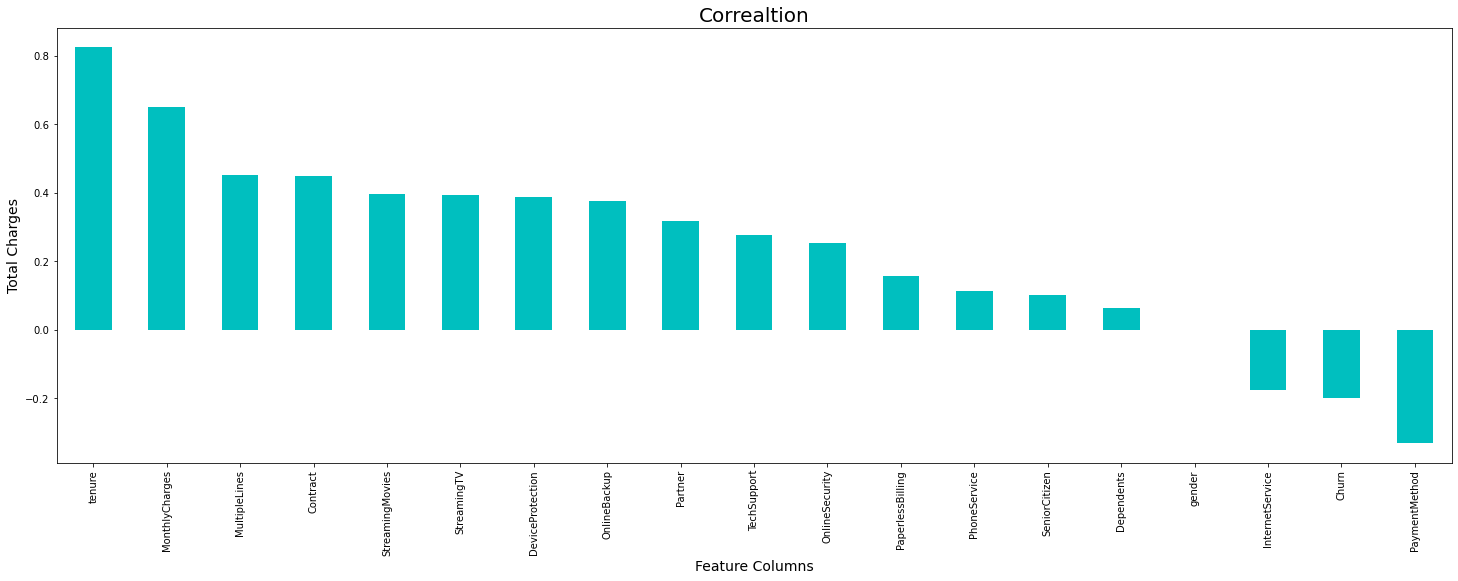

In [24]:
plt.figure(figsize=(25,8))
df2.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='c')
plt.ylabel('Total Charges',fontsize=14)
plt.xlabel('Feature Columns',fontsize=14)
plt.title("Correaltion",fontsize=20)
plt.show()

In [25]:
#Anything Under +0.5 to -0.5 is  normally distributed Column
df2.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220518
TotalCharges        0.962399
Churn               1.063031
dtype: float64

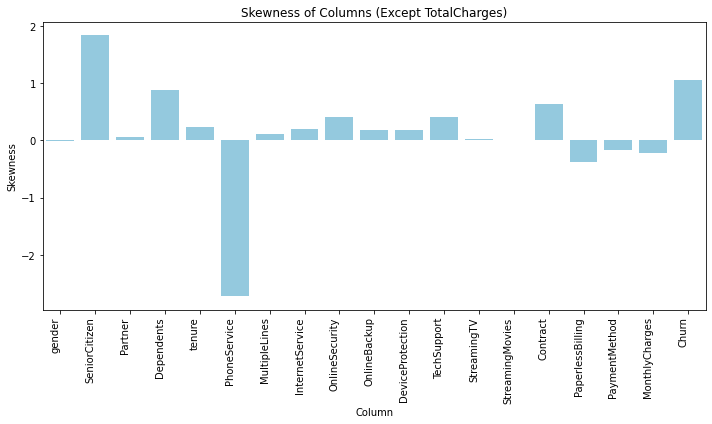

In [26]:
skewness = df2.drop(columns=['TotalCharges']).skew()
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values, color='skyblue')
plt.title('Skewness of Columns (Except TotalCharges)')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()
plt.show()

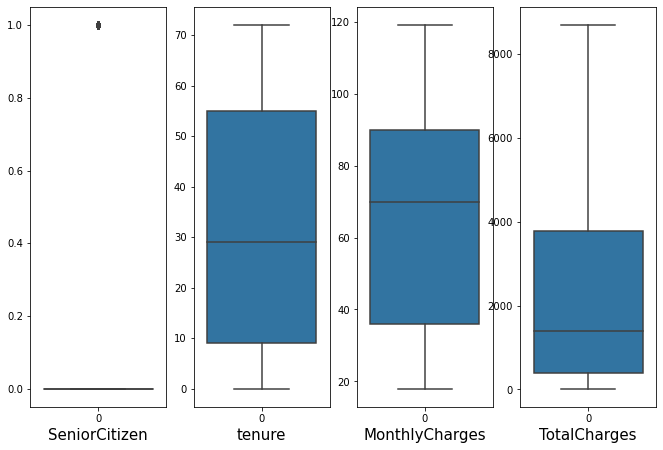

In [27]:
numeric_columns = df2.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 25))
graph = 1

for column in numeric_columns:
    if graph <= 21:
        plt.subplot(3, 7, graph)
        ax = sns.boxplot(data=df2[column])
        plt.xlabel(column, fontsize=15)
    graph += 1

plt.show()

We donot reduce the skewness of categorical column and target variable  we reduce the skewness of Continious data.

Since senior citizen is categorical data because it has only two values present in it so we cannot reduce its outliers

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [29]:
# Drop the 'customerID' column from the DataFrame
df2.drop(columns=['customerID'], inplace=True)


Zscore ensure that all the data comes under the range of standard deviation +3 to -3 

In [30]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df2))
threshol=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [31]:
new_z=df[(z<3).all(axis=1)]
new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,57.0,1890.0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,54.0,108.0,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,71.0,152.0,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.0,820.0,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.0,1949.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.0,1419.0,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,85.0,1990.0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.0,7363.0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.0,307.0,Yes


In [32]:
dataloss=((7043-6361)/7043)*100
dataloss

9.683373562402386

## Seperating Feature Column and Target Column

In [33]:
x=df2.drop("TotalCharges",axis=1)
y=df2['TotalCharges']

In [34]:
#Scaling the data using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

MMS=MinMaxScaler()
Lr=LinearRegression()

In [35]:
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    Lr.fit(x_train,y_train)
    pred_train=Lr.predict(x_train)
    pred_test=Lr.predict(x_test)
    print(f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"St ramdom state{i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is :- 0.9049293075266223
St ramdom state0,the testing accuracy is:- 0.9022269025343865


At random state 1,the training accuracy is :- 0.9048952566037392
St ramdom state1,the testing accuracy is:- 0.9018173017003719


At random state 2,the training accuracy is :- 0.9056628179071808
St ramdom state2,the testing accuracy is:- 0.8996616047363737


At random state 3,the training accuracy is :- 0.9046739352952395
St ramdom state3,the testing accuracy is:- 0.9027794556007457


At random state 4,the training accuracy is :- 0.9032050469417582
St ramdom state4,the testing accuracy is:- 0.9071128367261664


At random state 5,the training accuracy is :- 0.9030339881412031
St ramdom state5,the testing accuracy is:- 0.9074292420883134


At random state 6,the training accuracy is :- 0.9025609687721899
St ramdom state6,the testing accuracy is:- 0.9091737529090929


At random state 7,the training accuracy is :- 0.9037134600007036
St ramdom state7,the testing acc

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

In [37]:
Lr.fit(x_train, y_train)

LinearRegression()

In [38]:
pred_test = Lr.predict(x_test)
print(f"At random state 12, the testing accuracy is: {r2_score(y_test, pred_test)}")

At random state 12, the testing accuracy is: 0.9025744217134458


In [39]:
pred_train=Lr.predict(x_train)


In [40]:
Train_accuracy=r2_score(y_train, pred_train)
Test_accuracy=r2_score(y_test,pred_test)

In [41]:
from sklearn.model_selection import cross_val_score
for j in range (2,10):
    cv_score=cross_val_score(Lr, x, y, cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and training accuracy score is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.9034336810545023 and training accuracy score is 0.9047489147256754 and accuracy for testing is 0.9025744217134458


At cross fold 3 the cv score is 0.9036910102690081 and training accuracy score is 0.9047489147256754 and accuracy for testing is 0.9025744217134458


At cross fold 4 the cv score is 0.9037055750098231 and training accuracy score is 0.9047489147256754 and accuracy for testing is 0.9025744217134458


At cross fold 5 the cv score is 0.9036528942961747 and training accuracy score is 0.9047489147256754 and accuracy for testing is 0.9025744217134458


At cross fold 6 the cv score is 0.9037197269760825 and training accuracy score is 0.9047489147256754 and accuracy for testing is 0.9025744217134458


At cross fold 7 the cv score is 0.9035468312509284 and training accuracy score is 0.9047489147256754 and accuracy for testing is 0.9025744217134458


At cross fold 8 the cv score is 0.9035510133240378 and training accuracy score is 0.9047489147256754

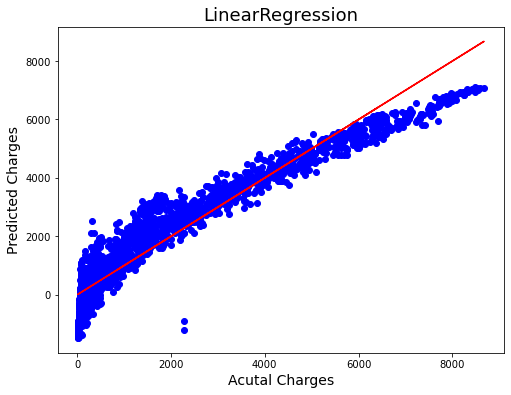

In [42]:
#Scatter plot to see the best fit line for  actual vs predicted  
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y= pred_test,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Acutal Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('LinearRegression',fontsize=18)
plt.savefig('lr.png')
plt.show()

As we can see Our best fit cover most of the data points so we can  say that our model is performing well . we furthur tune it to increase its accuracy using GridSearchCV.

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso


In [44]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


###  Finalising Model

In [45]:
ls=Lasso(alpha=.01,random_state=0)
ls.fit(x_train,y_train)
ls_score_train=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
#checking Score on Training data
ls_score_train*100

90.47489135707193

In [46]:
#checking Score on Testing Data
pred_lss=ls.predict(x_test)

In [47]:
test_ls= r2_score(y_test,pred_lss)
test_ls*100

90.25742161336395

In [48]:
cv_score =cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

90.36530003455539

Hence there is short diffrence between Testing data and Cross validation score so we can ignore it and move forward

### Ensemble technique 

In [49]:
from sklearn.ensemble import RandomForestRegressor  

In [50]:
parameters={'criterion':['mae','mse'],
    'max_features': ['auto', 'sqrt','log2']}
rfr=RandomForestRegressor()

In [51]:
clf=GridSearchCV(rfr, parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [53]:
Rf=RandomForestRegressor(criterion='mse',max_features='auto')
Rf.fit(x_train,y_train)
Rf.score(x_train,y_train)
pred=Rf.predict(x_test)
rfs=r2_score(y_test,pred)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(Rf,x,y,cv=5)
rfc=rfscore.mean()
print("Cross_val_score :",rfc*100)

R2 Score: 99.87968026841942
Cross_val_score : 99.87114620339936


After Hyperparameter Tuning the model is performing  well with accuracy and crossvalidation both as 98% which is good.

In [54]:
#Creating Pickle
import pickle
filename='churn.pkl'
pickle.dump(Rf,open(filename,"wb"))

In [ ]:
#checking Model Accuracy on Test Data

In [57]:
Model=pickle.load(open('churn.pkl','rb'))
result=Model.score(x_test,y_test)
print(result*100)

99.87968026841942


# Conclusion

In [58]:
prediction=pd.DataFrame([Model.predict(x_test)[:],pred[:]],index=['Predicted',"Original"])

In [59]:
prediction

,0,1,2,3,4,5,6,7,8,9,...,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760
Predicted,877.31,3075.95,1653.43,1656.34,3732.41,65.38,986.49,511.49,5441.4,172.46,...,792.22,1255.03,1007.64,1577.02,2154.47,5406.43,48.91,163.251667,4827.91,6426.51
Original,877.31,3075.95,1653.43,1656.34,3732.41,65.38,986.49,511.49,5441.4,172.46,...,792.22,1255.03,1007.64,1577.02,2154.47,5406.43,48.91,163.251667,4827.91,6426.51
